# <font color='deepskyblue'> Multivariate Models </font>

In general we want to model a conditional expectation:

$$\large \mathbb{E}(y|x_1,x_2,..x_p):=F(x_1,x_2,x_3,...x_p)$$

where $F$ represents the model (regressor) we consider.

## <font color='purple'> Variable Selection </font>

- We want to select only the features that are really important for our model.

- If the functional input-output model is $Y = F(X_1,X_2,X_3,X_4,X_5...X_p)$ then we imagine that it is very possible that only a subset of the variables $X_1,X_2,X_3,X_4,X_5...X_p$ are important and we need to disconsider (eliminate from the model) those that are not relevant.

- Programming and algorithms are based on equations, functions and statement evaluations.

- To represent variable selection in a functional way, we can think of multiplying each variable from the model by a binary weight, a weight of $0$ means the feature is not important and a weight of $1$ means that it is important:

$$
Y = F(w_1\cdot X_1,w_2\cdot X_2,w_3\cdot X_3,w_4\cdot X_4,w_5\cdot X_5...w_p\cdot X_p)
$$

where the weights $w_i$ are either $0$ or $1.$

The vector of binary weights $w=(w_1,w_2,w_3,...w_p)$ gives us what we call the ***sparsity pattern*** for the variable selection.

## Critical Aspects

1. What is the simplest choice for the function $F$?
2. How do we perform variable selection?
3. How do we accomodate nonlinear relationships?

# <font color='deepskyblue'> Variable Selection for Linear Models </font>

In the case of multiple linear regression we have that

$$F(X_1,X_2,...X_p)=\beta_1 X_1+\beta_2 X_2 + ...\beta_p X_p$$

and the sparsity pattern means that a subset of the $\beta_1, \beta_2, ...\beta_p$ are equal to $0.$

So we assume

$$ Y = X\cdot \beta^* +\sigma\epsilon $$

where $\beta^*$ is unknown and it has a sparsity pattern (i.e. only some or just very few components are different from 0.)

and we want the coefficients $\beta.$

The "classical" way of solving is:

$$X^{t}\cdot Y \approx X^{t}X\cdot \beta + \sigma X^{t}\epsilon$$


so we get

$$ \mathbb{E}(\beta) = (X^{t}X)^{-1} X^{t}\cdot \mathbb{E}(Y)$$

where $\mathbb{E}(Y)$ denotes the expected value of $Y.$

The questions that we explore are:

 - Why and how we know that we need variable selection.

 - How we measure the effects of variable selection on the model.

 - How to determine if the method of selecting a sparsity pattern is working in the context of our data.




Let's assume that we have some data with three features, such as


| Housing Area | Value | Property Tax | Sales Price |
| ------------ | ----- | ------------ | ----------- |
| 1800         | 234   | 9.8          | 267.5       |
| 1980         | 244   | 10.5         | 278.2       |
| 2120         | 252   | 16.2         | 284.5       |
| 2500         | 280   | 18.4         | 310.4       |


If this is the only data we have for these features do we need to do any variable selection for predicting the sales price with a linear model?



If we try to apply the least squares method to determine the best fit what would we do?


IMPORTANT:  The newly created matrix is rank defficient!
 This means X does not have 4 linearly independent columns.

## <font color= 'deepskyblue'> What does Rank Deficiency mean ?</font>

The assumption for multiple linear regression is

$$\large
Y = X\beta + \sigma \epsilon
$$

where $\sigma$ is the standard deviation of the noise. Further, we assume that the "noise" $\epsilon$ is independent and identically distributed with a zero mean.

We believe that the output is a linear combination of the input features.

Thus, if we would like to solve for the "weights" $\beta$ we may consider

$$\large X^tY = X^tX\beta+\sigma X^t\epsilon$$

And if the matrix $X^tX$ is invertible then we can solve for expected value of $\beta$:

$$\large
\mathbb{E}(\beta) = (X^tX)^{-1}X^t Y
$$

We can show by using *Linear Algebra* that the OLS solution obtained form minimizing the sum of the square residuals is equivalent.

### <font color='green'>  We can test whether the matrix $$X^tX$$ is invertible by simply computing its determinant and checking that it is not zero. </font>

### <font color='crimson'> IMPORTANT: When such matrix is not invertible we cannot apply this method to get the expected value of the weights. In this case if we minimize the sum of the squared residuals the algorithm cannot find just *one* best solution.</font>


## <font color='deepskyblue'> The difference between L1 and L2 norms </font>

In the following example the L2 norm of the vector $\vec{AB}$ is 5 and the L1 norm is $4+3=7$.

<figure>
<center>
<img src='https://i.imgur.com/J8Mda3S.png'
width='550px' />
<figcaption>The difference between the L1 and L2 norms</figcaption></center>
</figure>


## <font color= 'deepskyblue'> L2 Regularization - Tikhonov 1940's </font>

The L2 norm is

$$
\|\beta\|_2:=\left(\sum_{j=1}^{p}\beta_j^2\right)^{1/2}
$$

The Ridge model (also known as the *Tikhonov regularization*) consists of *learning* the weights by the following optimization:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha \sum\limits_{j=1}^{p}\beta_j^2$$

where $alpha$ is a constant that can be adjusted based on a feedback loop so it is a hyperparameter.

The hyperparameter $\alpha$ is becoming a "tunning" parameter.

This optimization is equivalent to minimizing the sum of the square residuals with a constraint on the sum of the squared weights

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2$$

subject to

$$
 \sum\limits_{j=1}^{p}\beta_j^2 < M
$$

## <font color= 'deepskyblue'> L1 Regularization as known as Lasso (Tibshirani, 1993) </font>

The L1 norm is

$$
\|\beta\|_1:=\sum_{j=1}^{p}|\beta_j|
$$

The Lasso model  consists of *learning* the weights by the following optimization:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha \|\beta\|_1$$

where $alpha$ is a constant that can be adjusted based on a feedback loop so it is a hyperparameter.

This optimization is equivalent to minimizing the sum of the square residuals with a constraint on the sum of the squared weights

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2$$

subject to

$$
 \sum\limits_{j=1}^{p}|\beta_j| < M
$$

## <font color='deepskyblue'> Geometric comparison in 2D between L1 and L2 regularizations


<figure>
<center>
<img src='https://i.imgur.com/e9EEJL7.png'
width='900px' />
<figcaption>Difference between L1 and L2</figcaption></center>
</figure>


## <font color= 'deepskyblue'> Elastic Net Regularization (2005) </font>

Tha main idea is to combine the L2 and L1 regularizations in a *convex* way, such as:

$$
\lambda\cdot \sum\limits_{j=1}^{p}|\beta_j| + (1-\lambda)\cdot\sum\limits_{j=1}^{p}\beta_j^2
$$

Here $0\leq\lambda\leq1$, $\alpha$ is formulated via the ratio between the two penalties such as 

$$\text{l}_1\text-{ratio}=\frac{\lambda}{1-\lambda}$$

The Elstic Net regularization consists of *learning* the weights by solving the following optimization problem:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha\left( \lambda\cdot \sum\limits_{j=1}^{p}|\beta_j| + (1-\lambda)\cdot\sum\limits_{j=1}^{p}\beta_j^2\right)$$

So with this regularization approach we have two hyperparameters that we need to decide on.

## <font color= 'blue'> In General - Main Idea </font>

We can accommodate more diverse situations if we consider the variable selection problem in the following way:



*   Solve an optimization problem such as

 $$\large \text{minimize  } \left(\text{Loss Function } + \text{ Penalty Function}\right)$$


 where the Loss Function ccould be seen as MSE or its square root, and the Penalty Function is a preferred to be a nonconcave function of the weights $\beta.$

*   For certain specific choices of the Loss Function and the Penalty Function, the solution of the penalized regression problem is approximating in probability an assumed ideal solution $\beta^*$ that has a certain sparsity, even if the input features have patterns of multiple correlations.



## <font color='blue'> Coefficient Paths </font>

One way to understand the effect of regularization is to show the paths of the weights as a function of the strength of the regularization (such as $\lambda$ parameter, per our notations.)

```python
# How to create coefficient paths example
plt.figure(figsize=(10, 4))

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(feats, bbox_to_anchor=[1,0.5], loc='center left')
plt.show()
```


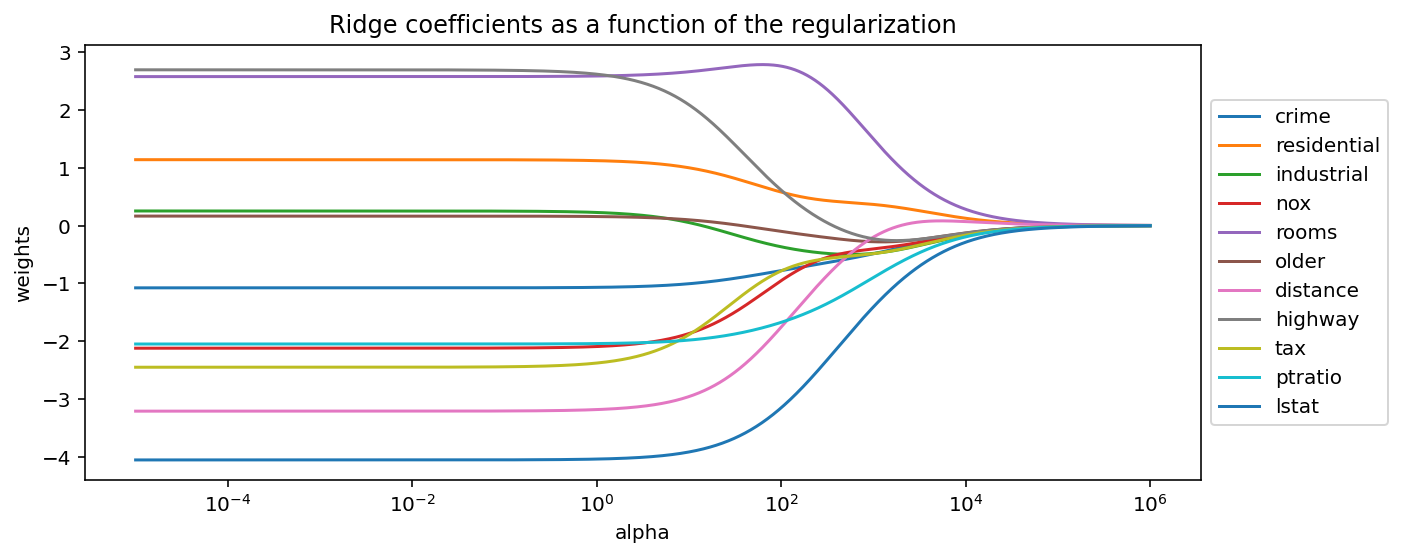

## <font color='deepskyblue'> Smoothly Clipped Absolute Deviations </font>

https://www.jstor.org/stable/27640214?seq=1

https://andrewcharlesjones.github.io/journal/scad.html

## <font color='deepskyblue'> Square Root Lasso </font>

https://arxiv.org/abs/1009.5689

*Square Root Lasso* is also based on minimizing an objective function plus a $L_1$ constraint (penalty).

For example, *Square Root Lasso* is represented by the following optimization problem:

$$
\displaystyle\text{minimize} \left(\frac{1}{n}\sum\limits_{i=1}^{n}(y_i-\hat{y}_i)^2\right)^{1/2} +\alpha\sum\limits_{i=1}^{p}|\beta_i|
$$

## Critical Thinking: When do we know we should use regularization:

- when we have to learn more weights than the number of independent observations (this is the case in deep learning).
- when we have strong multiple correlations among the input features (if the correlation between two features is very strong then we get a rank defficient case - please, for fun see https://www.tylervigen.com/spurious-correlations


## <font color = 'deepskyblue' size=6pt> Simulation Study </font>

We simulate a ground truth $\beta^*$ with a sparsity pattern, and then we simulate input features (data) that may have multicolinearity. We then create a response based on the following:

$$\large y = X\cdot \beta^* +\sigma\epsilon$$

For simulating multiple correlations we can use a Toeplitz matrix for the covariance of data matrix $X.$


What is the connection between correlation and covariance?

$$\text{corr}(X,Y) = \frac{\text{Cov(X,Y)}}{\sigma_X\cdot\sigma_Y}$$


In [ ]:
# setup
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split as tts, KFold
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.datasets import make_spd_matrix
from scipy.optimize import minimize
from scipy.linalg import toeplitz
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as R2

In [ ]:
# what is a Toeplitz matrix?
w = [0.5**0,0.5**1,0.5**2]
toeplitz(w)

array([[1.  , 0.5 , 0.25],
       [0.5 , 1.  , 0.5 ],
       [0.25, 0.5 , 1.  ]])

In [ ]:
# we want to define a function for generating x with a prescribed number of obsvervations, features and Toeplitz correlation structure.
def make_correlated_features(num_samples,p,rho):
  vcor = []
  for i in range(p):
    vcor.append(rho**i)
  r = toeplitz(vcor)
  mu = np.repeat(0,p)
  x = np.random.multivariate_normal(mu, r, size=num_samples)
  return x

In [ ]:
rho =0.9
p = 20
n = 150
vcor = []
for i in range(p):
  vcor.append(rho**i)

In [ ]:
x = make_correlated_features(n,p,rho)

In [ ]:
beta =np.array([-1,2,3,0,0,0,0,2,-1,4])

In [ ]:
beta = beta.reshape(-1,1)
betas = np.concatenate([beta,np.repeat(0,p-len(beta)).reshape(-1,1)],axis=0)


## Visualize Correlations

Plot various projections of the samples.

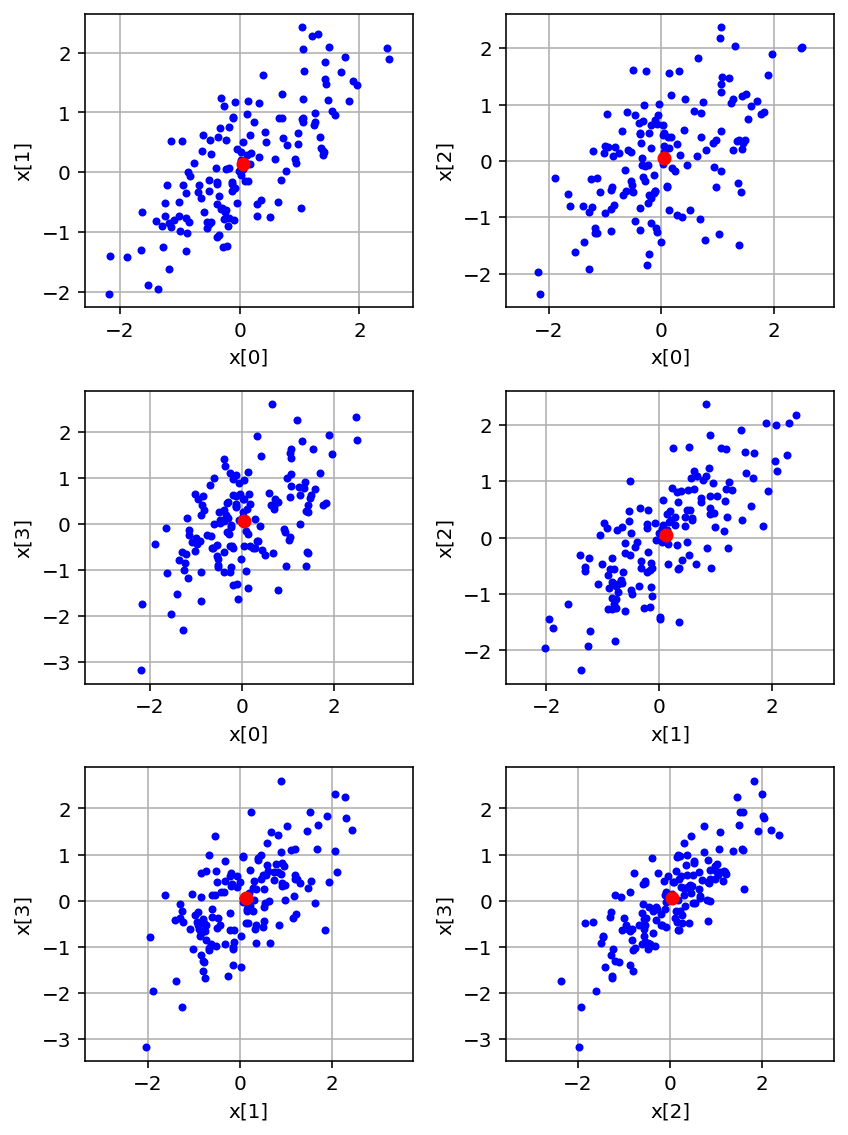

In [ ]:
# Plot various projections of the samples.

mu = np.mean(x,axis=0)

fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(6,8))


plt.subplot(3,2,1)
plt.plot(x[:,0], x[:,1], 'b.')
plt.plot(mu[0], mu[1], 'ro')
plt.xlabel('x[0]')
plt.ylabel('x[1]')
plt.axis('equal')
plt.grid(True)

plt.subplot(3,2,2)
plt.plot(x[:,0], x[:,2], 'b.')
plt.plot(mu[0], mu[2], 'ro')
plt.xlabel('x[0]')
plt.ylabel('x[2]')
plt.axis('equal')
plt.grid(True)

plt.subplot(3,2,3)
plt.plot(x[:,0], x[:,3], 'b.')
plt.plot(mu[0], mu[3], 'ro')
plt.xlabel('x[0]')
plt.ylabel('x[3]')
plt.axis('equal')
plt.grid(True)

plt.subplot(3,2,4)
plt.plot(x[:,1], x[:,2], 'b.')
plt.plot(mu[1], mu[2], 'ro')
plt.xlabel('x[1]')
plt.ylabel('x[2]')
plt.axis('equal')
plt.grid(True)

plt.subplot(3,2,5)
plt.plot(x[:,1], x[:,3], 'b.')
plt.plot(mu[1], mu[3], 'ro')
plt.xlabel('x[1]')
plt.ylabel('x[3]')
plt.axis('equal')
plt.grid(True)

plt.subplot(3,2,6)
plt.plot(x[:,2], x[:,3], 'b.')
plt.plot(mu[2], mu[3
                   ], 'ro')
plt.xlabel('x[2]')
plt.ylabel('x[3]')
plt.axis('equal')
plt.grid(True)
fig.tight_layout()
plt.show()

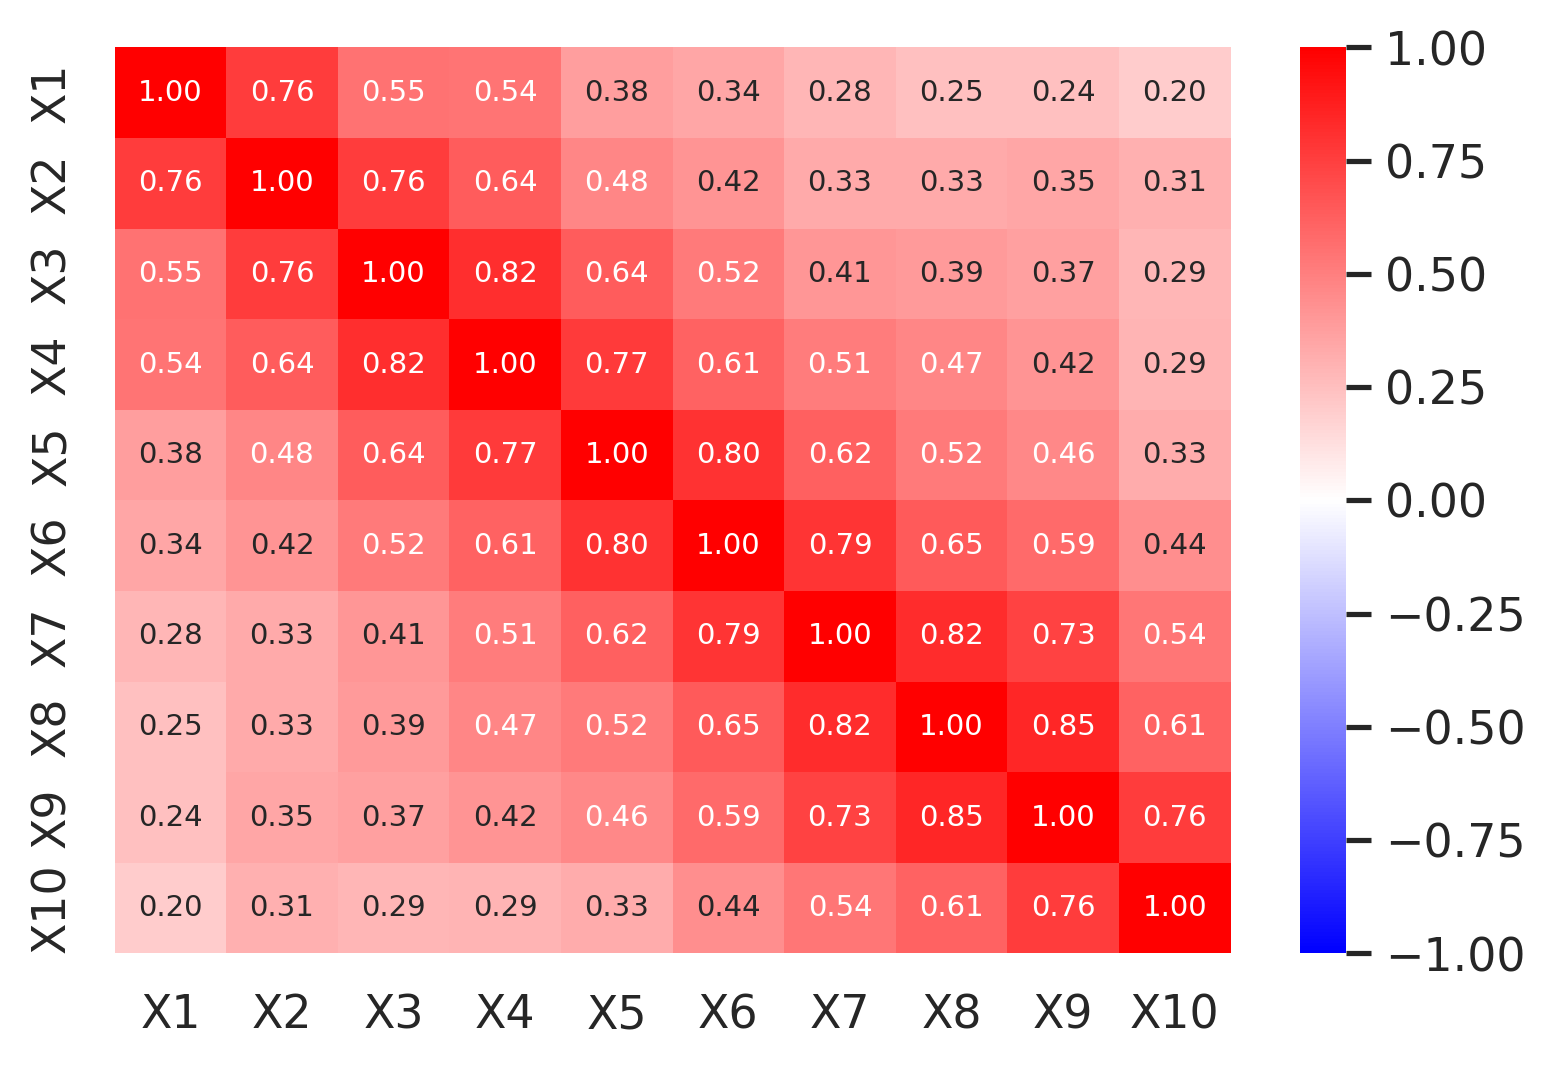

In [ ]:
cols = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']

# mind the transpose of x
# here we look at the correlations among the first 10 features
sns.heatmap(np.corrcoef(np.transpose(x[:,:10])),cmap='bwr',vmin=-1,vmax=1,annot=True,fmt='.2f',annot_kws={"size": 7},xticklabels=cols,yticklabels=cols)
plt.show()

# <font color='deepskyblue'> Examples in PyTorch</font>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

## Define Scalers

In [ ]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, data):
        """
        Compute the minimum and maximum value of the data for scaling.

        Args:
        - data (torch.Tensor): Input data tensor.
        """
        self.mean = torch.mean(data, dim=0, keepdim=True)
        self.std = torch.std(data, dim=0, keepdim=True)+1e-10

    def transform(self, data):
        """
        Scale the data based on the computed minimum and maximum values.

        Args:
        - data (torch.Tensor): Input data tensor.

        Returns:
        - torch.Tensor: Scaled data tensor.
        """
        if self.mean is None or self.std is None:
            raise ValueError("Scaler has not been fitted yet. Please call 'fit' with appropriate data.")

        scaled_data = (data - self.mean) / (self.std)
        return scaled_data

    def fit_transform(self, data):
        """
        Fit to data, then transform it.

        Args:
        - data (torch.Tensor): Input data tensor.

        Returns:
        - torch.Tensor: Scaled data tensor.
        """
        self.fit(data)
        return self.transform(data)

In [ ]:
class MinMaxScaler:
    def __init__(self):
        self.min = None
        self.max = None

    def fit(self, data):
        """
        Compute the minimum and maximum value of the data for scaling.

        Args:
        - data (torch.Tensor): Input data tensor.
        """
        self.min = torch.min(data, dim=0, keepdim=True).values
        self.max = torch.max(data, dim=0, keepdim=True).values

    def transform(self, data):
        """
        Scale the data based on the computed minimum and maximum values.

        Args:
        - data (torch.Tensor): Input data tensor.

        Returns:
        - torch.Tensor: Scaled data tensor.
        """
        if self.min is None or self.max is None:
            raise ValueError("Scaler has not been fitted yet. Please call 'fit' with appropriate data.")

        scaled_data = (data - self.min) / (self.max - self.min)
        return scaled_data

    def fit_transform(self, data):
        """
        Fit to data, then transform it.

        Args:
        - data (torch.Tensor): Input data tensor.

        Returns:
        - torch.Tensor: Scaled data tensor.
        """
        self.fit(data)
        return self.transform(data)

## Define Regressors

In [ ]:
class ElasticNet(nn.Module):
    def __init__(self, input_size, alpha=1.0, l1_ratio=0.5):
        """
        Initialize the ElasticNet regression model.

        Args:
            input_size (int): Number of input features.
            alpha (float): Regularization strength. Higher values of alpha
                emphasize L1 regularization, while lower values emphasize L2 regularization.
            l1_ratio (float): The ratio of L1 regularization to the total
                regularization (L1 + L2). It should be between 0 and 1.

        """
        super(ElasticNet, self).__init__()
        self.input_size = input_size
        self.alpha = alpha
        self.l1_ratio = l1_ratio

        # Define the linear regression layer
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        """
        Forward pass of the ElasticNet model.

        Args:
            x (Tensor): Input data with shape (batch_size, input_size).

        Returns:
            Tensor: Predicted values with shape (batch_size, 1).

        """
        return self.linear(x)

    def loss(self, y_pred, y_true):
        """
        Compute the ElasticNet loss function.

        Args:
            y_pred (Tensor): Predicted values with shape (batch_size, 1).
            y_true (Tensor): True target values with shape (batch_size, 1).

        Returns:
            Tensor: The ElasticNet loss.

        """
        mse_loss = nn.MSELoss()(y_pred, y_true)
        l1_reg = torch.norm(self.linear.weight, p=1)
        l2_reg = torch.norm(self.linear.weight, p=2)

        loss = mse_loss + self.alpha * (
            self.l1_ratio * l1_reg + (1 - self.l1_ratio) * l2_reg
        )

        return loss

    def fit(self, X, y, num_epochs=100, learning_rate=0.01):
        """
        Fit the ElasticNet model to the training data.

        Args:
            X (Tensor): Input data with shape (num_samples, input_size).
            y (Tensor): Target values with shape (num_samples, 1).
            num_epochs (int): Number of training epochs.
            learning_rate (float): Learning rate for optimization.

        """
        optimizer = optim.SGD(self.parameters(), lr=learning_rate)

        for epoch in range(num_epochs):
            self.train()
            optimizer.zero_grad()
            y_pred = self(X)
            loss = self.loss(y_pred, y)
            loss.backward()
            optimizer.step()

            if (epoch + 1) % 10 == 0:
                print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}")

    def predict(self, X):
        """
        Predict target values for input data.

        Args:
            X (Tensor): Input data with shape (num_samples, input_size).

        Returns:
            Tensor: Predicted values with shape (num_samples, 1).

        """
        self.eval()
        with torch.no_grad():
            y_pred = self(X)
        return y_pred
    def get_coefficients(self):
        """
        Get the coefficients (weights) of the linear regression layer.

        Returns:
            Tensor: Coefficients with shape (output_size, input_size).

        """
        return self.linear.weight


In [ ]:
# we can call this version PED_Adam because we use the adaptive momentum gradient descent for optimization
class sqrtLasso(nn.Module):
    def __init__(self, input_size, alpha=0.1):
        """
        Initialize the  regression model.


        """
        super(sqrtLasso, self).__init__()
        self.input_size = input_size
        self.alpha = alpha


        # Define the linear regression layer
        self.linear = nn.Linear(input_size, 1).double()

    def forward(self, x):
        """
        Forward pass of the model.

        Args:
            x (Tensor): Input data with shape (batch_size, input_size).

        Returns:
            Tensor: Predicted values with shape (batch_size, 1).

        """
        return self.linear(x)

    def loss(self, y_pred, y_true):
        """
        Compute the loss function.

        Args:
            y_pred (Tensor): Predicted values with shape (batch_size, 1).
            y_true (Tensor): True target values with shape (batch_size, 1).

        Returns:
            Tensor: The loss.

        """
        mse_loss = nn.MSELoss()(y_pred, y_true)
        l1_reg = torch.norm(self.linear.weight, p=1,dtype=torch.float64)
        # l2_reg = torch.norm(self.linear.weight, p=2,dtype=torch.float64)

        loss = (len(y_true)*mse_loss)**(1/2) + self.alpha * (l1_reg)

        return loss

    def fit(self, X, y, num_epochs=200, learning_rate=0.01):
        """
        Fit the model to the training data.

        Args:
            X (Tensor): Input data with shape (num_samples, input_size).
            y (Tensor): Target values with shape (num_samples, 1).
            num_epochs (int): Number of training epochs.
            learning_rate (float): Learning rate for optimization.

        """
        optimizer = optim.Adam(self.parameters(), lr=learning_rate)

        for epoch in range(num_epochs):
            self.train()
            optimizer.zero_grad()
            y_pred = self(X)
            loss = self.loss(y_pred, y)
            loss.backward()
            optimizer.step()

            if (epoch + 1) % 100 == 0:
                print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}")

    def predict(self, X):
        """
        Predict target values for input data.

        Args:
            X (Tensor): Input data with shape (num_samples, input_size).

        Returns:
            Tensor: Predicted values with shape (num_samples, 1).

        """
        self.eval()
        with torch.no_grad():
            y_pred = self(X)
        return y_pred
    def get_coefficients(self):
        """
        Get the coefficients (weights) of the linear regression layer.

        Returns:
            Tensor: Coefficients with shape (output_size, input_size).

        """
        return self.linear.weight